In [1]:
from itertools import combinations
import math
import os

from itertools import combinations
import lightgbm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import *
from sklearn.gaussian_process import GaussianProcessRegressor

from rshdmrgpr.rs_hdmr_gpr1 import *

In [2]:
def print_kernel_info(models):
    idx = 1
    for model in models:
        print(f"Component function {idx} optimized kernel: {model.kernel_}")
        idx += 1

This notebook supplements the research paper:  
  
<font color='red'>**Random Sampling High Dimensional Model Representation Gaussian Process Regression (RS-HDMR-GPR): a code for representing multidimensional functions with lower-dimensional terms**</font>
    
The following section contains code used to generate the figures in Sections 3.2.

In [3]:
# Extracts the data set
data = load_data('KED')

In [4]:
data.min()

a1     4.660084e-05
a2     0.000000e+00
a3    -1.792079e-02
a4     0.000000e+00
a5    -1.436699e-03
a6     1.100000e-14
a7    -8.939882e-02
out    7.299957e-04
dtype: float64

In [5]:
# Scales the data set to be between [0, 1]
scale = data['out'].max() - data['out'].min()
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data), columns=data.columns)

In [6]:
features = data_scaled.drop(columns=['out'])
labels = data_scaled['out']

In [7]:
data.head()

,a1,a2,a3,a4,a5,a6,a7,out
0,0.000224,0.000000,0.004583,0.000000,0.000000,0.093880,0.011589,0.002946
1,0.000278,0.000403,0.005023,0.000585,0.007290,0.090925,0.012134,0.003776
2,0.000487,0.001494,0.006073,0.004582,0.018629,0.075739,0.013103,0.006063
3,0.001004,0.002777,0.006860,0.007680,0.018973,0.046869,0.012994,0.008953
4,0.002046,0.003409,0.006222,0.005680,0.010368,0.018924,0.008730,0.010948


In [8]:
data.shape

(585890, 8)

##### Helper Functions

In [9]:
def get_RMSE(y, y_pred):
    """Computes the RMSE between two vectors"""
    rmse = math.sqrt(mean_squared_error(y, y_pred))
    print(f'The RMSE is {rmse}')
    return rmse

### Full GPR Fits

In [10]:
# We prepare 3 sets of training and testing data of sizes: 500, 2000 and 5000
x_train1, x_test1, y_train1, y_test1 = train_test_split(data_scaled.drop(columns=['out']), data_scaled['out'], train_size=500, test_size=None, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_scaled.drop(columns=['out']), data_scaled['out'], train_size=2000, test_size=None, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(data_scaled.drop(columns=['out']), data_scaled['out'], train_size=5000, test_size=None, random_state=42)
d = data.shape[1] - 1

In [11]:
# FullGPR initializations. Only isotropic kernels are used.
gpr1 = GaussianProcessRegressor(kernel=RBF(0.5), alpha=5*1e-4, n_restarts_optimizer=1, optimizer=None)
gpr2 = GaussianProcessRegressor(kernel=RBF(0.5), alpha=5*1e-4, n_restarts_optimizer=1, optimizer=None)
gpr3 = GaussianProcessRegressor(kernel=RBF(0.5), alpha=5*1e-5, n_restarts_optimizer=1, optimizer=None)

In [12]:
gpr1.fit(x_train1, y_train1)

GaussianProcessRegressor(alpha=0.0005, copy_X_train=True,
                         kernel=RBF(length_scale=0.5), n_restarts_optimizer=1,
                         normalize_y=False, optimizer=None, random_state=None)

In [13]:
gpr2.fit(x_train2, y_train2)

GaussianProcessRegressor(alpha=0.0005, copy_X_train=True,
                         kernel=RBF(length_scale=0.5), n_restarts_optimizer=1,
                         normalize_y=False, optimizer=None, random_state=None)

In [14]:
gpr3.fit(x_train3, y_train3)

GaussianProcessRegressor(alpha=5e-05, copy_X_train=True,
                         kernel=RBF(length_scale=0.5), n_restarts_optimizer=1,
                         normalize_y=False, optimizer=None, random_state=None)

In [15]:
# Length scale results after fit:
print(gpr1.kernel_, gpr2.kernel_, gpr3.kernel_)

RBF(length_scale=0.5) RBF(length_scale=0.5) RBF(length_scale=0.5)


In [16]:
y_pred1 = batch_predict(gpr1, features)

50000 batches have been predicted.
100000 batches have been predicted.
150000 batches have been predicted.
200000 batches have been predicted.
250000 batches have been predicted.
300000 batches have been predicted.
350000 batches have been predicted.
400000 batches have been predicted.
450000 batches have been predicted.
500000 batches have been predicted.
550000 batches have been predicted.


In [17]:
y_pred2 = batch_predict(gpr2, features)

50000 batches have been predicted.
100000 batches have been predicted.
150000 batches have been predicted.
200000 batches have been predicted.
250000 batches have been predicted.
300000 batches have been predicted.
350000 batches have been predicted.
400000 batches have been predicted.
450000 batches have been predicted.
500000 batches have been predicted.
550000 batches have been predicted.


In [18]:
y_pred3 = batch_predict(gpr3, features)

50000 batches have been predicted.
100000 batches have been predicted.
150000 batches have been predicted.
200000 batches have been predicted.
250000 batches have been predicted.
300000 batches have been predicted.
350000 batches have been predicted.
400000 batches have been predicted.
450000 batches have been predicted.
500000 batches have been predicted.
550000 batches have been predicted.


In [19]:
get_RMSE(y_pred1 * scale, labels * scale)
get_RMSE(y_pred2 * scale, labels * scale)
get_RMSE(y_pred3 * scale, labels * scale)

The RMSE is 0.0004865521756389935
The RMSE is 0.00026881388624647325
The RMSE is 0.00020460754666026622


0.00020460754666026622

In [20]:
print('R^2 value for the 500 point fit is:', np.corrcoef(y_pred1 * scale, data_scaled['out'] * scale)[0, 1] ** 2)
print('R^2 value for the 2000 point fit is:', np.corrcoef(y_pred2 * scale, data_scaled['out'] * scale)[0, 1] ** 2)
print('R^2 value for the 5000 point fit is:', np.corrcoef(y_pred3 * scale, data_scaled['out'] * scale)[0, 1] ** 2)

R^2 value for the 500 point fit is: 0.9936010996658304
R^2 value for the 2000 point fit is: 0.9980471854899746
R^2 value for the 5000 point fit is: 0.9988679182087349


Root mean squared error is: 0.0004865521756389935


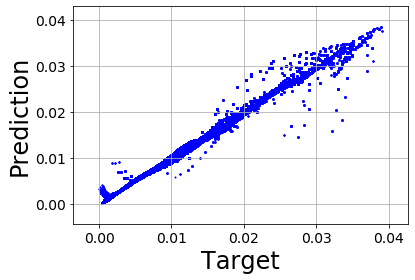

In [21]:
# 500 points
correlation_plot(data_scaled['out'] * scale, y_pred1 * scale, xlabel='Target', ylabel='Prediction')
# plot_for_paper(data_scaled['out'] * scale, y_pred1 * scale, xlabel='Target', ylabel='Prediction', name=f'fullGPR_500.png', save=True)

Root mean squared error is: 0.00026881388624647325


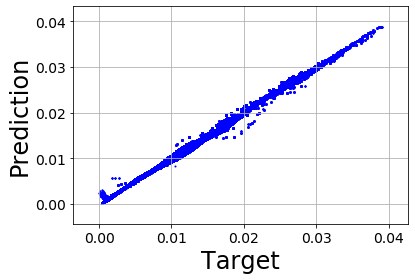

In [22]:
# 2000 points
correlation_plot(data_scaled['out'] * scale, y_pred2 * scale, xlabel='Target', ylabel='Prediction')
# plot_for_paper(data_scaled['out'] * scale, y_pred2 * scale, xlabel='Target', ylabel='Prediction', name=f'fullGPR_2000.png', save=True)

Root mean squared error is: 0.00020460754666026622


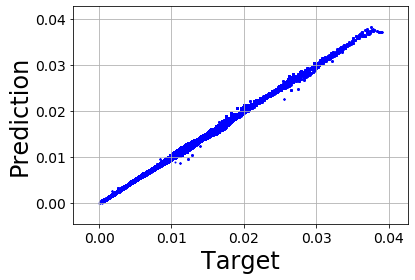

In [23]:
# 5000 points
correlation_plot(data_scaled['out'] * scale, y_pred3 * scale, xlabel='Target', ylabel='Prediction')
# plot_for_paper(data_scaled['out'] * scale, y_pred3 * scale, xlabel='Target', ylabel='Prediction', name=f'fullGPR_5000.png', save=True)

### HDMR FITS

In [24]:
# Initializes the Model classes for training
matrices1, kernels1 = kernel_matrices(1, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
matrices2, kernels2 = kernel_matrices(2, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
matrices3, kernels3 = kernel_matrices(3, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
matrices4, kernels4 = kernel_matrices(4, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
matrices5, kernels5 = kernel_matrices(5, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
matrices6, kernels6 = kernel_matrices(6, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
matrices7, kernels7 = kernel_matrices(7, 7, length_scale=0.5)#, length_scale_bounds=(0.3, 10000))
hdmr_1d = RSHDMRGPR(matrices1, kernels1)
hdmr_2d = RSHDMRGPR(matrices2, kernels2)
hdmr_3d = RSHDMRGPR(matrices3, kernels3)
hdmr_4d = RSHDMRGPR(matrices4, kernels4)
hdmr_5d = RSHDMRGPR(matrices5, kernels5)
hdmr_6d = RSHDMRGPR(matrices6, kernels6)
hdmr_7d = RSHDMRGPR(matrices7, kernels7)

In [25]:
# models = [hdmr_1d, hdmr_2d, hdmr_3d, hdmr_4d, hdmr_5d,hdmr_6d, hdmr_7d]
hdmr = [hdmr_1d, hdmr_2d, hdmr_3d, hdmr_4d, hdmr_5d, hdmr_6d, hdmr_7d]
alphas = [3 * 1e-3, 8 * 1e-4, 3 * 1e-4, 8 * 1e-5, 3 * 1e-5, 8 * 1e-6, 3 * 1e-6]

In [26]:
sequential_fitting(x_train1, y_train1, hdmr, alphas=alphas, cycles=50, optimizer="fmin_l_bfgs_b", opt_every=5, scale_down=(0.2, 2))

The hyperparameters used are: {'alphas': [0.003, 0.0008, 0.00030000000000000003, 8e-05, 3.0000000000000004e-05, 8e-06, 3e-06], 'cycles': 50, 'scale_down': (0.2, 2), 'optimizer': 'fmin_l_bfgs_b', 'opt_every': 5, 'use_columns': None, 'n_restarts': 1, 'initializer': 'even', 'verbose': 1}

MODEL 1 with 7 component functions has started training.
Training iteration for CYCLE 1 has started.
Training iteration for CYCLE 2 has started.
Training iteration for CYCLE 3 has started.
Training iteration for CYCLE 4 has started.
Training iteration for CYCLE 5 has started.
Training iteration for CYCLE 6 has started.
Training iteration for CYCLE 7 has started.
Training iteration for CYCLE 8 has started.
Training iteration for CYCLE 9 has started.
Training iteration for CYCLE 10 has started.
Training iteration for CYCLE 11 has started.
Training iteration for CYCLE 12 has started.
Training iteration for CYCLE 13 has started.
Training iteration for CYCLE 14 has started.
Training iteration for CYCLE 15 has

C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 17 has started.
Training iteration for CYCLE 18 has started.
Training iteration for CYCLE 19 has started.
Training iteration for CYCLE 20 has started.
Training iteration for CYCLE 21 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 22 has started.
Training iteration for CYCLE 23 has started.
Training iteration for CYCLE 24 has started.
Training iteration for CYCLE 25 has started.
Training iteration for CYCLE 26 has started.
Training iteration for CYCLE 27 has started.
Training iteration for CYCLE 28 has started.
Training iteration for CYCLE 29 has started.
Training iteration for CYCLE 30 has started.
Training iteration for CYCLE 31 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 32 has started.
Training iteration for CYCLE 33 has started.
Training iteration for CYCLE 34 has started.
Training iteration for CYCLE 35 has started.
Training iteration for CYCLE 36 has started.
Training iteration for CYCLE 37 has started.
Training iteration for CYCLE 38 has started.
Training iteration for CYCLE 39 has started.
Training iteration for CYCLE 40 has started.
Training iteration for CYCLE 41 has started.
Training iteration for CYCLE 42 has started.
Training iteration for CYCLE 43 has started.
Training iteration for CYCLE 44 has started.
Training iteration for CYCLE 45 has started.
Training iteration for CYCLE 46 has started.
Training iteration for CYCLE 47 has started.
Training iteration for CYCLE 48 has started.
Training iteration for CYCLE 49 has started.
Training iteration for CYCLE 50 has started.
Training completed. Total time for training is 210.47 seconds.

MODEL 3 with 7 component functions has started training.
Training iteration for C

C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 2 has started.
Training iteration for CYCLE 3 has started.
Training iteration for CYCLE 4 has started.
Training iteration for CYCLE 5 has started.
Training iteration for CYCLE 6 has started.
Training iteration for CYCLE 7 has started.
Training iteration for CYCLE 8 has started.
Training iteration for CYCLE 9 has started.
Training iteration for CYCLE 10 has started.
Training iteration for CYCLE 11 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 12 has started.
Training iteration for CYCLE 13 has started.
Training iteration for CYCLE 14 has started.
Training iteration for CYCLE 15 has started.
Training iteration for CYCLE 16 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 17 has started.
Training iteration for CYCLE 18 has started.
Training iteration for CYCLE 19 has started.
Training iteration for CYCLE 20 has started.
Training iteration for CYCLE 21 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 22 has started.
Training iteration for CYCLE 23 has started.
Training iteration for CYCLE 24 has started.
Training iteration for CYCLE 25 has started.
Training iteration for CYCLE 26 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 27 has started.
Training iteration for CYCLE 28 has started.
Training iteration for CYCLE 29 has started.
Training iteration for CYCLE 30 has started.
Training iteration for CYCLE 31 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 32 has started.
Training iteration for CYCLE 33 has started.
Training iteration for CYCLE 34 has started.
Training iteration for CYCLE 35 has started.
Training iteration for CYCLE 36 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 37 has started.
Training iteration for CYCLE 38 has started.
Training iteration for CYCLE 39 has started.
Training iteration for CYCLE 40 has started.
Training iteration for CYCLE 41 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 42 has started.
Training iteration for CYCLE 43 has started.
Training iteration for CYCLE 44 has started.
Training iteration for CYCLE 45 has started.
Training iteration for CYCLE 46 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 47 has started.
Training iteration for CYCLE 48 has started.
Training iteration for CYCLE 49 has started.
Training iteration for CYCLE 50 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training completed. Total time for training is 365.20 seconds.

MODEL 4 with 7 component functions has started training.
Training iteration for CYCLE 1 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 2 has started.
Training iteration for CYCLE 3 has started.
Training iteration for CYCLE 4 has started.
Training iteration for CYCLE 5 has started.
Training iteration for CYCLE 6 has started.
Training iteration for CYCLE 7 has started.
Training iteration for CYCLE 8 has started.
Training iteration for CYCLE 9 has started.
Training iteration for CYCLE 10 has started.
Training iteration for CYCLE 11 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 12 has started.
Training iteration for CYCLE 13 has started.
Training iteration for CYCLE 14 has started.
Training iteration for CYCLE 15 has started.
Training iteration for CYCLE 16 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

Training iteration for CYCLE 17 has started.
Training iteration for CYCLE 18 has started.
Training iteration for CYCLE 19 has started.
Training iteration for CYCLE 20 has started.
Training iteration for CYCLE 21 has started.
Training iteration for CYCLE 22 has started.
Training iteration for CYCLE 23 has started.
Training iteration for CYCLE 24 has started.
Training iteration for CYCLE 25 has started.
Training iteration for CYCLE 26 has started.
Training iteration for CYCLE 27 has started.
Training iteration for CYCLE 28 has started.
Training iteration for CYCLE 29 has started.
Training iteration for CYCLE 30 has started.
Training iteration for CYCLE 31 has started.
Training iteration for CYCLE 32 has started.
Training iteration for CYCLE 33 has started.
Training iteration for CYCLE 34 has started.
Training iteration for CYCLE 35 has started.
Training iteration for CYCLE 36 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 37 has started.
Training iteration for CYCLE 38 has started.
Training iteration for CYCLE 39 has started.
Training iteration for CYCLE 40 has started.
Training iteration for CYCLE 41 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 42 has started.
Training iteration for CYCLE 43 has started.
Training iteration for CYCLE 44 has started.
Training iteration for CYCLE 45 has started.
Training iteration for CYCLE 46 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training iteration for CYCLE 47 has started.
Training iteration for CYCLE 48 has started.
Training iteration for CYCLE 49 has started.
Training iteration for CYCLE 50 has started.


C:\Users\owenz\Anaconda3\envs\pureai2\lib\site-packages\sklearn\gaussian_process\_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Training completed. Total time for training is 164.30 seconds.

MODEL 5 with 7 component functions has started training.
Training iteration for CYCLE 1 has started.
Training iteration for CYCLE 2 has started.
Training iteration for CYCLE 3 has started.
Training iteration for CYCLE 4 has started.
Training iteration for CYCLE 5 has started.
Training iteration for CYCLE 6 has started.
Training iteration for CYCLE 7 has started.
Training iteration for CYCLE 8 has started.
Training iteration for CYCLE 9 has started.
Training iteration for CYCLE 10 has started.
Training iteration for CYCLE 11 has started.
Training iteration for CYCLE 12 has started.
Training iteration for CYCLE 13 has started.
Training iteration for CYCLE 14 has started.
Training iteration for CYCLE 15 has started.
Training iteration for CYCLE 16 has started.
Training iteration for CYCLE 17 has started.
Training iteration for CYCLE 18 has started.
Training iteration for CYCLE 19 has started.
Training iteration for CYCLE 20 h

In [27]:
preds1 = sequential_prediction(data_scaled.drop(columns=['out']), hdmr)

50000 batches have been predicted.
100000 batches have been predicted.
150000 batches have been predicted.
200000 batches have been predicted.
250000 batches have been predicted.
300000 batches have been predicted.
350000 batches have been predicted.
400000 batches have been predicted.
450000 batches have been predicted.
500000 batches have been predicted.
550000 batches have been predicted.
50000 batches have been predicted.
100000 batches have been predicted.
150000 batches have been predicted.
200000 batches have been predicted.
250000 batches have been predicted.
300000 batches have been predicted.
350000 batches have been predicted.
400000 batches have been predicted.
450000 batches have been predicted.
500000 batches have been predicted.
550000 batches have been predicted.
50000 batches have been predicted.
100000 batches have been predicted.
150000 batches have been predicted.
200000 batches have been predicted.
250000 batches have been predicted.
300000 batches have been predic

In [28]:
i = 1
for p in preds1:
    v = np.corrcoef(p * scale, data_scaled['out'] * scale)[0,1]
    print(f'R^2 for the {i}d-hdmr fit is', v ** 2)
    i += 1

R^2 for the 1d-hdmr fit is 0.9351587364543041
R^2 for the 2d-hdmr fit is 0.8724943283715572
R^2 for the 3d-hdmr fit is 0.872494286322405
R^2 for the 4d-hdmr fit is 0.8940423127108331
R^2 for the 5d-hdmr fit is 0.8940423126928672
R^2 for the 6d-hdmr fit is 0.8940423126855852
R^2 for the 7d-hdmr fit is 0.894042312684353


In [29]:
i = 1
for p in preds1:
    get_RMSE(p * scale, data_scaled['out'] * scale)
    i += 1

The RMSE is 0.001574439457598454
The RMSE is 0.002526711414296949
The RMSE is 0.0025267108463923687
The RMSE is 0.0022539471681923464
The RMSE is 0.002253947162208248
The RMSE is 0.0022539471598157644
The RMSE is 0.0022539471594149392


In [30]:
idx = 1
for model in hdmr:
    print(f"Model {idx}'s hyperparameters:")
    print_kernel_info(model.get_models())
    idx += 1

Model 1's hyperparameters:
Component function 1 optimized kernel: RBF(length_scale=0.317) + WhiteKernel(noise_level=0.000522)
Component function 2 optimized kernel: RBF(length_scale=0.251) + WhiteKernel(noise_level=0.000522)
Component function 3 optimized kernel: RBF(length_scale=0.123) + WhiteKernel(noise_level=0.000526)
Component function 4 optimized kernel: RBF(length_scale=3.25e+04) + WhiteKernel(noise_level=0.000513)
Component function 5 optimized kernel: RBF(length_scale=0.154) + WhiteKernel(noise_level=0.000565)
Component function 6 optimized kernel: RBF(length_scale=0.138) + WhiteKernel(noise_level=0.000558)
Component function 7 optimized kernel: RBF(length_scale=0.22) + WhiteKernel(noise_level=0.000546)
Model 2's hyperparameters:
Component function 1 optimized kernel: RBF(length_scale=1e+05) + WhiteKernel(noise_level=0.000145)
Component function 2 optimized kernel: RBF(length_scale=1e+05) + WhiteKernel(noise_level=0.000145)
Component function 3 optimized kernel: RBF(length_sca